### 0. Read csv files

In [100]:
import numpy as np
import pandas as pd
import os
from IPython.display import display
import warnings
import ipynbname
from pathlib import Path
warnings.filterwarnings('ignore')

# 设置显示选项
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 100)

In [101]:
# direct_llm_id = "direct_llm_20samples_rag_evaluation_results_20251121_104026"
direct_llm_id = "direct_llm_experiment_20251205_192854_30b"
# direct_llm_id = "direct_llm_experiment_20251205_193210"
directory = Path(f"../results/{direct_llm_id}")
direct_llm_baseline_path = list(directory.glob(f"rag*.csv"))
direct_llm_baseline_df = pd.read_csv(direct_llm_baseline_path[0])

# crud_id = "crud_hybrid_aip_test_20_full_20251121_161550"
crud_id = "crud_hybrid_aip_test_full_20251205_230331"
crud_root = Path('../results/crud_30b')
# crud_id = "crud_hybrid_aip_test_full_20251205_211114"
# crud_root = Path('../results/crud_8b')
crud_baseline_path = list(crud_root.glob(f"{crud_id}*.csv"))
crud_baseline_df = pd.read_csv(crud_baseline_path[0])

# 获取所有实验文件夹
# results_base_dir = "../results/8b_short"
results_base_dir = "../results/30b_short"
experiment_folders = [d for d in os.listdir(results_base_dir) 
                     if os.path.isdir(os.path.join(results_base_dir, d)) and d.startswith('experiment_')]
experiment_id = None
# experiment_id = "experiment_20251207_060548"
experiment_id = "max"
if not experiment_id:
    latest_experiment = max(experiment_folders)
    experiment_folder = os.path.join(results_base_dir, latest_experiment)
    print(f"\n选择最新的实验文件夹: {latest_experiment}")
else:
    experiment_folder = os.path.join(results_base_dir, experiment_id)
    print(f"\n选择提供的的实验文件夹: {experiment_id}")


选择提供的的实验文件夹: max


### 1. 处理计算intermediate结果

In [102]:
# from process_intermediate import process_intermediate, calculate_intermediate_metrics
csv_files = [f for f in os.listdir(experiment_folder) 
                 if f.endswith('.csv') and 'rag_evaluation' in f]
csv_df = pd.read_csv(os.path.join(experiment_folder, csv_files[0]))
# process_intermediate(experiment_folder)
# # if 'intermediate_ndcg' not in csv_df:
# csv_df = calculate_intermediate_metrics(experiment_folder)

In [103]:
direct_llm_baseline_df.describe()

,metric_with_token,perf_score,overall_score,llm_judge_score,rejection_recall,ndcg,ncg,mrr,pre_search_ndcg,pre_search_mrr,pre_search_ncg,pre_search_retrieved_ids,rag_agent_input_tokens,rag_agent_output_tokens,rag_agent_tokens,rag_agent_total_tokens,search_agent_input_tokens,search_agent_output_tokens,search_agent_tokens_total,search_agent_total_tokens,average_search_agent_input_token,average_search_agent_output_token,average_search_agent_token,num_search_calls,total_num_tokens,total_num_input_tokens,total_num_output_tokens,per_task_retrieved_ids,per_task_ndcg,per_task_ncg,per_task_input_tokens,per_task_output_tokens,per_task_total_tokens,per_task_metric_with_token,per_task_perf_score,retrieved_id,execution_time_seconds,ndcg_at_3,ndcg_at_5,retrieved_count,response_sources
count,0.0,0.0,118.000000,98.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118.000000,0.0,0.0,98.0,0.0
mean,NaN,NaN,0.557627,0.559184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.745093,NaN,NaN,0.0,NaN
std,NaN,NaN,0.464722,0.457658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.339955,NaN,NaN,0.0,NaN
min,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.441000,NaN,NaN,0.0,NaN
25%,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.794250,NaN,NaN,0.0,NaN
50%,NaN,NaN,0.700000,0.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.347000,NaN,NaN,0.0,NaN
75%,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.552500,NaN,NaN,0.0,NaN
max,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.481000,NaN,NaN,0.0,NaN


In [104]:
crud_baseline_df.describe()

,execution_time_seconds,overall_score,llm_judge_score,mrr,rejection_recall,ndcg,ndcg_at_3,ndcg_at_5,ncg,retrieved_count
count,118.000000,118.000000,98.000000,98.000000,0.0,98.000000,98.000000,98.000000,98.000000,118.000000
mean,1.489932,0.737500,0.710204,0.838776,NaN,0.833931,0.782624,0.827878,0.937075,9.940678
std,0.460597,0.340272,0.390477,0.285350,NaN,0.233626,0.297277,0.241411,0.179912,0.494281
min,0.649000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,5.000000
25%,1.146000,0.410000,0.325000,0.625000,NaN,0.661547,0.617593,0.635928,1.000000,10.000000
50%,1.474000,0.926186,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,10.000000
75%,1.781750,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,10.000000
max,2.884000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,10.000000


### 2. 可视化指标

,metric_with_token,perf_score,overall_score,llm_judge_score,rejection_recall,ndcg,ncg,mrr,pre_search_ndcg,pre_search_mrr,pre_search_ncg,pre_search_retrieved_ids,rag_agent_input_tokens,rag_agent_output_tokens,rag_agent_tokens,rag_agent_total_tokens,search_agent_input_tokens,search_agent_output_tokens,search_agent_tokens_total,search_agent_total_tokens,average_search_agent_input_token,average_search_agent_output_token,average_search_agent_token,num_search_calls,total_num_tokens,total_num_input_tokens,total_num_output_tokens,execution_time_seconds,ndcg_at_3,ndcg_at_5,retrieved_count,intermediate_ndcg,intermediate_ncg,intermediate_ndcg_at_3,intermediate_ndcg_at_5,ndcg_inter-final_diff,ncg_inter-final_diff,search_agent_ndcg,search_agent_ncg,ndcg_search_agent-final_diff,ncg_search_agent-final_diff,ndcg_inter-search_agent_diff,ncg_inter-search_agent_diff,num_tasks
count,118.000000,118.000000,118.000000,98.000000,0.0,98.000000,98.000000,98.000000,0.0,0.0,0.0,0.0,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.00000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,98.000000,98.000000,98.000000,97.000000,97.000000,97.000000,97.000000,9.700000e+01,97.0,0.0,0.0,0.0,0.0,0.0,0.0,100.000000
mean,0.653652,0.327599,0.784073,0.729592,NaN,0.781662,0.758503,0.889456,NaN,NaN,NaN,NaN,489.686441,156.516949,646.203390,181.001271,2279.245763,1526.347458,3805.59322,1640.309746,1134.194209,840.336864,1974.531073,1.567797,2539.322034,1479.355932,1059.966102,28.873407,0.781662,0.781662,1.571429,0.789721,0.766323,0.789721,0.789721,4.578239e-18,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.850000
std,0.222185,0.029934,0.305394,0.350025,NaN,0.313899,0.327371,0.294998,NaN,NaN,NaN,NaN,349.290164,62.067889,393.335562,74.834972,3209.415755,1143.304368,4100.55204,1262.239036,1249.463472,480.451671,1571.961457,1.025144,2329.354024,1622.796950,797.716334,56.863369,0.313899,0.313899,0.673504,0.305171,0.319740,0.305171,0.305171,1.534966e-17,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.845368
min,0.091423,0.251520,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,2.000000,41.000000,50.000000,41.750000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,41.000000,0.363000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,0.575661,0.306025,0.682629,0.700000,NaN,0.613147,0.500000,1.000000,NaN,NaN,NaN,NaN,284.000000,115.250000,408.250000,131.112500,581.000000,787.000000,1413.75000,819.912500,443.625000,615.125000,1095.125000,1.000000,1039.000000,502.000000,555.250000,10.991250,0.613147,0.613147,1.000000,0.613147,0.500000,0.613147,0.613147,0.000000e+00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,0.800394,0.326370,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,431.500000,158.000000,604.500000,184.075000,1248.500000,1380.500000,2735.50000,1483.975000,758.875000,825.833333,1759.750000,2.000000,2009.500000,991.500000,932.000000,19.166500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
75%,0.813153,0.347555,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,658.000000,201.750000,883.000000,234.937500,2797.500000,2116.250000,5229.00000,2235.762500,1428.833333,1177.750000,2602.250000,2.000000,3474.500000,2075.000000,1370.750000,27.211250,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
max,0.823800,0.383300,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,1634.000000,334.000000,1821.000000,371.200000,22638.000000,5949.000000,28587.00000,7080.900000,8043.000000,2381.000000,9299.000000,4.000000,15705.000000,11666.000000,4039.000000,427.472000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,5.551115e-17,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.000000


主实验数值指标: ['metric_with_token', 'perf_score', 'overall_score', 'llm_judge_score', 'ndcg', 'ncg', 'mrr', 'rag_agent_input_tokens', 'rag_agent_output_tokens', 'rag_agent_tokens', 'rag_agent_total_tokens', 'search_agent_input_tokens', 'search_agent_output_tokens', 'search_agent_tokens_total', 'search_agent_total_tokens', 'average_search_agent_input_token', 'average_search_agent_output_token', 'average_search_agent_token', 'num_search_calls', 'total_num_tokens', 'total_num_input_tokens', 'total_num_output_tokens', 'execution_time_seconds', 'ndcg_at_3', 'ndcg_at_5', 'retrieved_count', 'is_refusal', 'intermediate_ndcg', 'intermediate_ncg', 'intermediate_ndcg_at_3', 'intermediate_ndcg_at_5', 'ndcg_inter-final_diff', 'ncg_inter-final_diff', 'num_tasks']
CRUD baseline指标: ['overall_score', 'llm_judge_score', 'ndcg', 'ncg', 'mrr', 'execution_time_seconds', 'ndcg_at_3', 'ndcg_at_5', 'retrieved_count', 'is_refusal']
Direct LLM baseline指标: ['overall_score', 'llm_judge_score', 'execution_time_seconds'

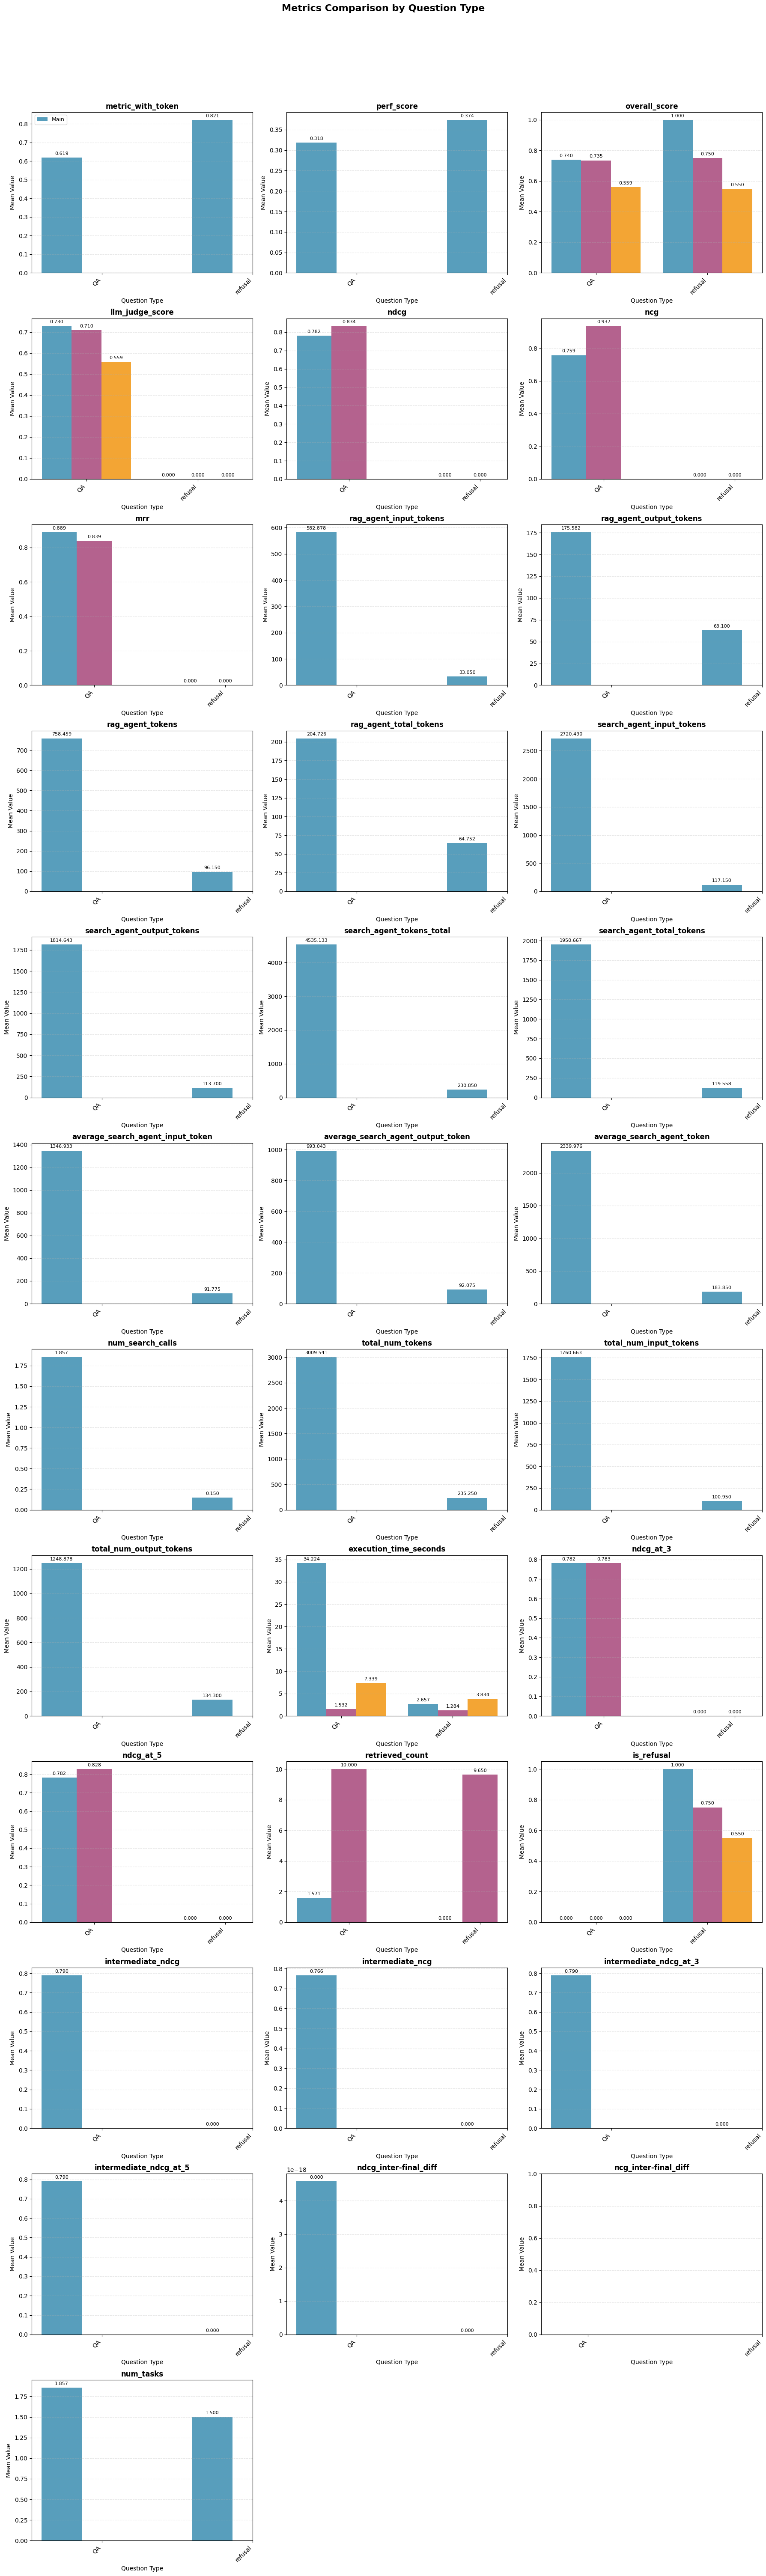

In [105]:
from visualization import visualize_csv
numeric_df = csv_df.select_dtypes(include=[np.number])
display(numeric_df.describe())
fig = visualize_csv(csv_df, crud_df=crud_baseline_df, direct_llm_df=direct_llm_baseline_df)

### 3. save HTML

In [106]:
from save_html import create_html_report_stable
notebook_path = ipynbname.path()
notebook_name = os.path.basename(notebook_path)
name_without_ext = os.path.splitext(notebook_name)[0]

# 确保实验文件夹存在
experiment_folder = os.path.abspath(experiment_folder)
os.makedirs(experiment_folder, exist_ok=True)
create_html_report_stable(experiment_folder, notebook_path)

✅ 已创建无代码 HTML 报告: /home/dyvm6xra/dyvm6xrauser44/wujiamin/AgenticRAG/rag_evals/results/30b_short/max/report.html
📊 报告中只包含 markdown 和输出，代码已自动隐藏


In [ ]:
import os
import json

# Define the directory path
folders = '/home/dyvm6xra/dyvm6xrauser44/wujiamin/AgenticRAG/rag_evals/results/30b'
for exps in os.listdir(folders):
    processed_json_dir = os.path.join(folders, exps, "processed_json")

    # List files that contain the specified string
    matching_files = []
    for file_name in os.listdir(processed_json_dir):
        file_path = os.path.join(processed_json_dir, file_name)
        if file_name.endswith('.json'):
            with open(file_path, 'r', encoding='utf-8') as file:
                try:
                    content = json.load(file)
                    if any('"name": "read' in json.dumps(content) for content in content.values()):
                        matching_files.append(file_path)
                    # if any('"name": "read"' in json.dumps(content))
                except json.JSONDecodeError:
                    continue

    print("Files containing '\"name\": \"read\"':", matching_files) 

Files containing '"name": "read"': ['/home/dyvm6xra/dyvm6xrauser44/wujiamin/AgenticRAG/rag_evals/results/30b/experiment_20251205_193423/processed_json/processed_crud_sample_0008.json', '/home/dyvm6xra/dyvm6xrauser44/wujiamin/AgenticRAG/rag_evals/results/30b/experiment_20251205_193423/processed_json/processed_crud_sample_0009.json', '/home/dyvm6xra/dyvm6xrauser44/wujiamin/AgenticRAG/rag_evals/results/30b/experiment_20251205_193423/processed_json/processed_crud_sample_0010.json', '/home/dyvm6xra/dyvm6xrauser44/wujiamin/AgenticRAG/rag_evals/results/30b/experiment_20251205_193423/processed_json/processed_crud_sample_0013.json', '/home/dyvm6xra/dyvm6xrauser44/wujiamin/AgenticRAG/rag_evals/results/30b/experiment_20251205_193423/processed_json/processed_crud_sample_0015.json', '/home/dyvm6xra/dyvm6xrauser44/wujiamin/AgenticRAG/rag_evals/results/30b/experiment_20251205_193423/processed_json/processed_crud_sample_0016.json', '/home/dyvm6xra/dyvm6xrauser44/wujiamin/AgenticRAG/rag_evals/results/3

FileNotFoundError: [Errno 2] No such file or directory: '/home/dyvm6xra/dyvm6xrauser44/wujiamin/AgenticRAG/rag_evals/results/30b/max/processed_json'

: 